In [1]:
import numpy as np
import pandas as pd
import graph_tool.all as gt
import matplotlib.pyplot as plt

In [7]:
cpair = np.load('cpair.npy')
g = gt.Graph(directed=False)
g.vertex_properties['id'] = g.add_edge_list(cpair, hashed=True)
g

<Graph object, undirected, with 195 vertices and 782240 edges at 0x7f4c1feddcc0>

In [5]:
cpair.shape

(782240, 2)

In [3]:
cname = np.load('cname.npy')
names = np.array(pd.merge(pd.DataFrame(g.vertex_properties['id'].a),
                          pd.DataFrame(cname), left_on=0, right_on=0)[1])
g.vertex_properties['name'] = g.new_vertex_property("string", names)

In [4]:
%time ccluster = gt.minimize_blockmodel_dl(g)

CPU times: user 27.1 s, sys: 724 ms, total: 27.9 s
Wall time: 19 s


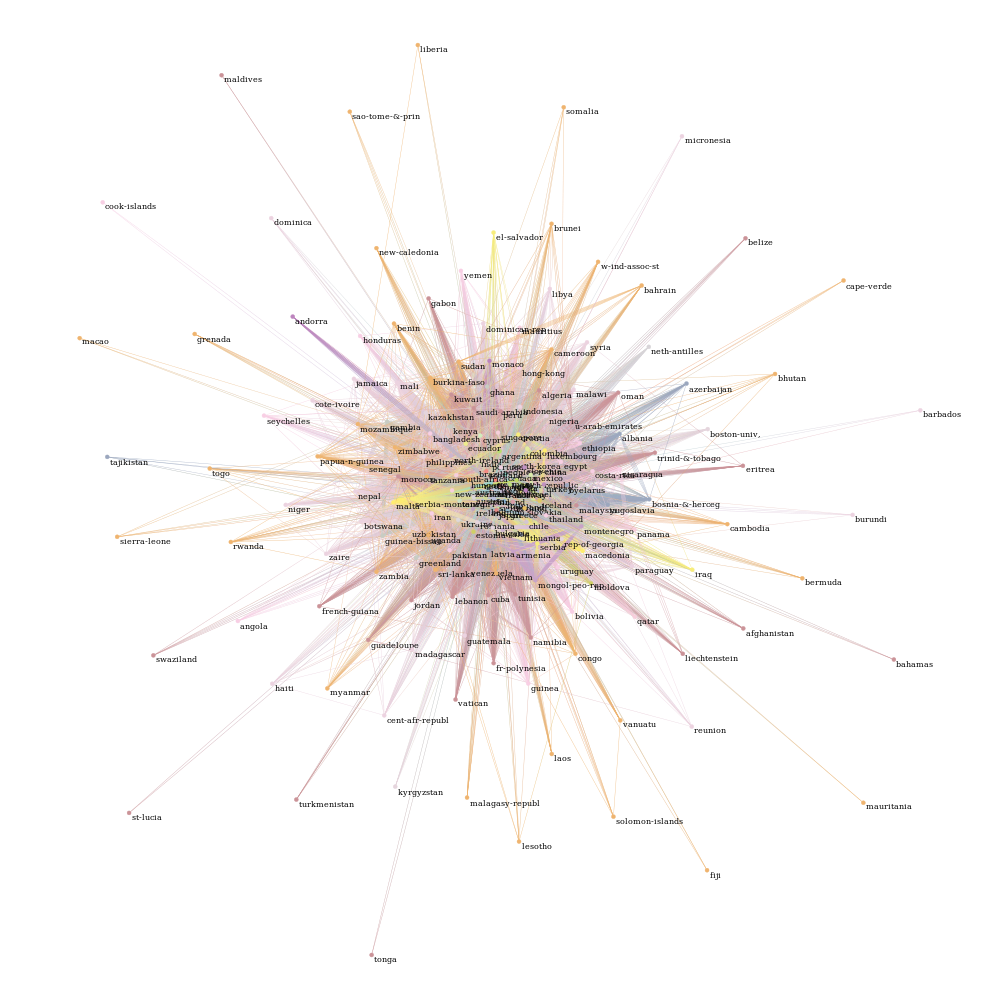

CPU times: user 2min 34s, sys: 288 ms, total: 2min 34s
Wall time: 2min 35s


<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f8277005cf8, at 0x7f8250d02b70>

In [5]:
%time ccluster.draw(vertex_font_size=8, vertex_size=4, vertex_text_position=1,
                    vertex_text=g.vertex_properties['name'], output_size=(1000, 1000), output='testccluster.png')

In [6]:
%time cclustern = gt.minimize_nested_blockmodel_dl(g)

CPU times: user 2min 34s, sys: 3.92 s, total: 2min 38s
Wall time: 1min 19s


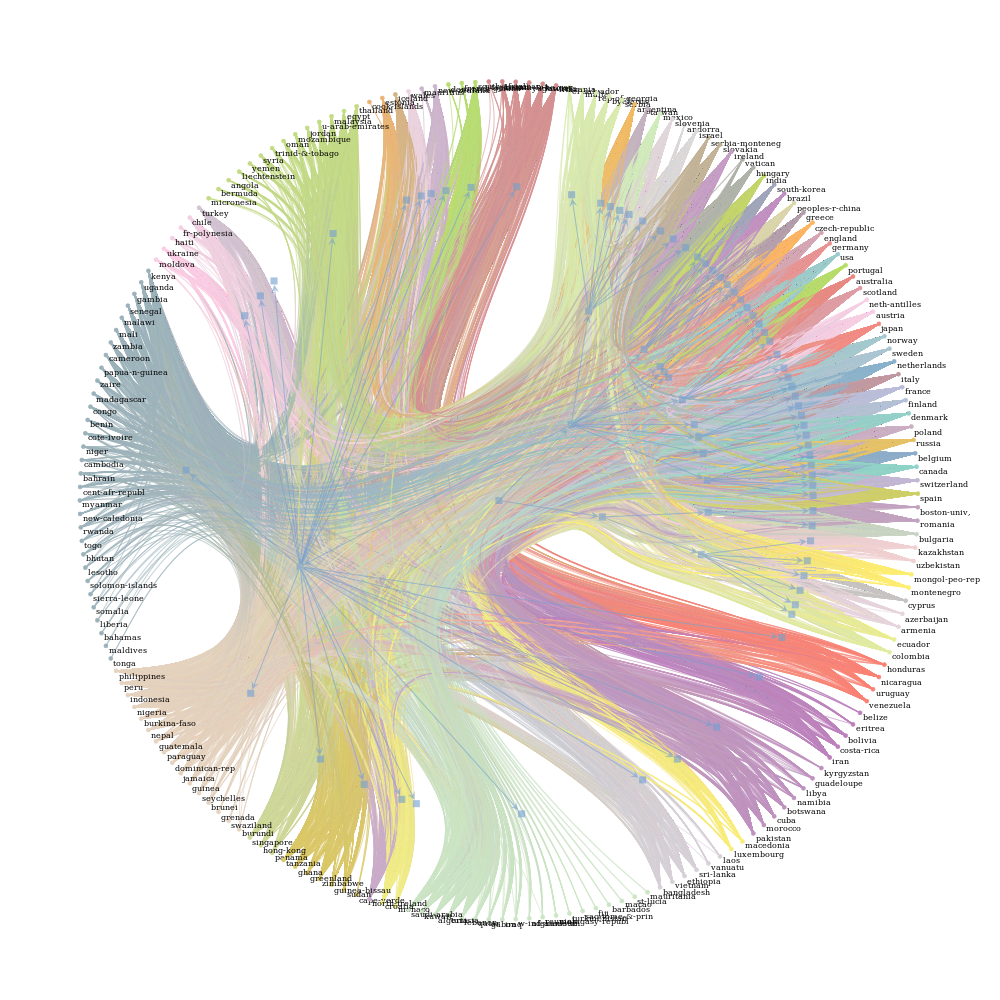

CPU times: user 10min 5s, sys: 872 ms, total: 10min 6s
Wall time: 10min 5s


(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f8277005cf8, at 0x7f82500f0748>,
 <Graph object, directed, with 277 vertices and 276 edges at 0x7f82500c77f0>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f82500c77f0, at 0x7f82512f3588>)

In [8]:
%time cclustern.draw(vertex_font_size=8, vertex_size=4, vertex_text_position=1,
                     vertex_text=g.vertex_properties['name'], output_size=(1000, 1000), output='testcclustern.png')